In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D,SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout,GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import keras.backend as K
import keras

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 6s 0us/step


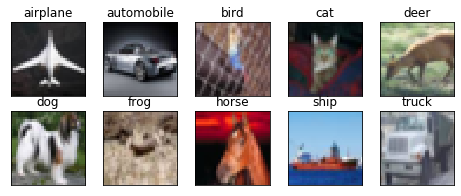

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [7]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))#32,3
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))#30,5
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))#15,6
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))#15,10
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))#13,14
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))#6,16
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))#6,24
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))#4,32
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))#2,28
model.add(Dropout(0.25))
model.add(Flatten())#2*2*192
model.add(Dense(512))#512
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))#256
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))#10
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
#model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/50
390/390 [==============================] - 23s 59ms/step - loss: 1.8543 - acc: 0.2910 - val_loss: 1.4445 - val_acc: 0.4708
Epoch 2/50
390/390 [==============================] - 20s 52ms/step - loss: 1.3493 - acc: 0.5138 - val_loss: 1.1457 - val_acc: 0.5967
Epoch 3/50
390/390 [==============================] - 20s 52ms/step - loss: 1.1196 - acc: 0.6027 - val_loss: 0.9519 - val_acc: 0.6656
Epoch 4/50
390/390 [==============================] - 21s 53ms/step - loss: 0.9723 - acc: 0.6599 - val_loss: 0.8246 - val_acc: 0.7122
Epoch 5/50
390/390 [==============================] - 20s 53ms/step - loss: 0.8815 - acc: 0.6942 - val_loss: 0.7955 - val_acc: 0.7267
Epoch 6/50
390/390 [==============================] - 21s 53ms/step - loss: 0.7961 - acc: 0.7273 - val_loss: 0.7320 - val_acc: 0.7499
Epoch 7/50
390/390 [==============================] - 20s 52ms/step - loss: 0.7571 - acc: 0.7418 - val_loss: 0.6716 - val_acc: 0.7664
Epoch 8/50
390/390 [==============================] - 20s 52ms

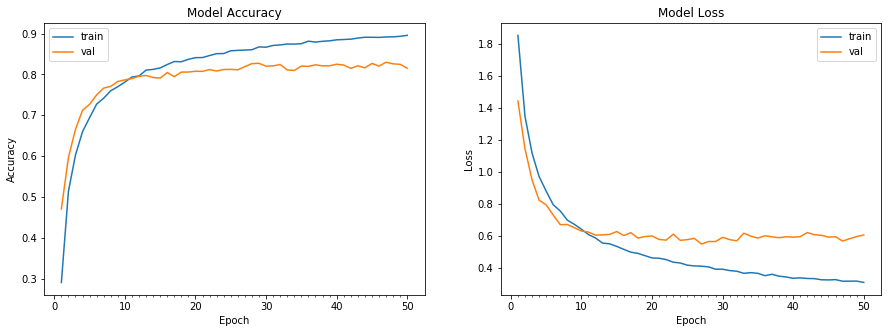

Accuracy on test data is: 81.50


In [20]:

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

## Model building 
Goal~ Achieve > 82.94% accuracy using depth wise separable convolution and fewer than 100,000 parameters


Observations about current model--
1. Model is using 6 convolutional layers with filters starting from 48 to 192. The model is starting with 48 filters. 
2. The model is not using 1x1 layer to reduce the number of filters after MaxPool. The ever increasing number of filters are extracted using 3x3 filter everywhere. This definitely is leading to higer # of parameters
3. Model is heavily regularised using Dropout.
4. Large # of parameters are added by Dense layers and then they are heavily egularized with dropout of almost 0.5. This implies indirectly that the number of parameters here can be easily reduced
5. Model is not using batchnormization anywhere. Should be definitely added as that will smoothen the loss surface much, will enable faster training and add a bit of regularization


In [0]:
#Learning Rate Finder
class LRFinder(keras.callbacks.Callback):
  def __init__(self,model,smooth=0.02,lr_min=1e-4,lr_max=10,min_loss=1e9,max_iters=1200):
    self.model = model
    self.min_loss=min_loss
    self.smooth=smooth
    self.lr_min=lr_min
    self.lr_max=lr_max
    self.iters=0
    self.lrs=[]
    self.losses=[]
    self.max_iters=max_iters
  def reset(self):
    self.losses=[]
    self.lrs=[]
    self.min_loss=1e9
    self.avg_loss=0.
    self.lr_growth = (self.lr_max/self.lr_min)**(1/self.max_iters)
  def on_batch_begin(self,batch,logs):
    lr = K.get_value(self.model.optimizer.lr)

  def on_batch_end(self,batch,logs):
    lr = K.get_value(self.model.optimizer.lr)
    self.lrs.append(lr)
    self.iters+=1
    loss = logs['loss']  
    self.avg_loss = self.avg_loss + self.smooth*(loss-self.avg_loss)
    #self.avg_loss/=(1-(1-self.smooth)**self.iters)
    self.losses.append(self.avg_loss)
    if self.avg_loss > self.min_loss*10 or self.iters>=self.max_iters:
      print(self.avg_loss,self.min_loss,self.iters,self.max_iters)
      self.model.stop_training=True
    else:
      if self.avg_loss<self.min_loss and self.iters>20:
        self.min_loss=self.avg_loss
      lr_new = self.lr_min*self.lr_growth**(self.iters)
      K.set_value(self.model.optimizer.lr,lr_new)
  def on_train_begin(self,logs):
    self.reset()
    K.set_value(self.model.optimizer.lr,self.lr_min)

    




In [0]:
  def build_model(p_conv=0.1,p_lin=0.2):
      
    # Define the model
    model = Sequential()
    model.add(SeparableConv2D(64, 3, 3, border_mode='same', input_shape=(32, 32, 3)))#32,3
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(p_conv))

    model.add(SeparableConv2D(64, 3, 3))#30,5
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(p_conv))


    model.add(MaxPooling2D(pool_size=(2, 2)))#15,6


    model.add(SeparableConv2D(64, 3, 3, border_mode='same'))#15,10
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(p_conv))

    model.add(SeparableConv2D(128, 3, 3))#13,14
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(p_conv))


    model.add(MaxPooling2D(pool_size=(2, 2)))#6,16


    model.add(SeparableConv2D(128, 3, 3, border_mode='same'))#6,24
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(p_conv))

    model.add(SeparableConv2D(128, 3, 3))#4,32
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(p_conv))


    model.add(GlobalAveragePooling2D())#2,36


    model.add(Dense(256))#512
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(p_lin))

    model.add(Dense(num_classes, activation='softmax'))#10
    return model


In [19]:
model=build_model(p_conv=0.1,p_lin=0.1)
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(128, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(128, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_19 (Separab (None, 32, 32, 64)        283       
_________________________________________________________________
batch_normalization_22 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_30 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
separable_conv2d_20 (Separab (None, 30, 30, 64)        4736      
_________________________________________________________________
batch_normalization_23 (Batc (None, 30, 30, 64)        256       
_________________________________________________________________
activation_31 (Activation)   (None, 30, 30, 64)       

In [20]:
#datagen = ImageDataGenerator(horizontal_flip=True,zoom_range=0.1,rotation_range=30)
datagen = ImageDataGenerator(horizontal_flip=True,zoom_range=0.1)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
start = time.time()
finder_callback = LRFinder(model,lr_min=1e-6,lr_max=10,max_iters=900)
model_info=model.fit_generator(datagen.flow(train_features,train_labels,batch_size=128),samples_per_epoch=train_features.shape[0],nb_epoch=5,
                    validation_data=(test_features,test_labels),verbose=1,callbacks=[finder_callback])
end=time.time()
print(f'Total time to fit {end-start}')
#plot_model_history(model_info)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<__main__..., steps_per_epoch=390, epochs=5)`
  


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
390/390 [==============================] - 30s 76ms/step - loss: 2.3127 - acc: 0.1890 - val_loss: 2.9772 - val_acc: 0.1930
Epoch 2/5
390/390 [==============================] - 25s 64ms/step - loss: 1.7467 - acc: 0.3649 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/5
120/390 [========>.....................] - ETA: 17s - loss: 4.2153 - acc: 0.11115.244844685292149 0.9299978826746373 900 900
Total time to fit 65.68716859817505


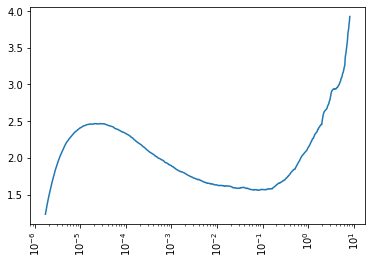

In [21]:
n_skip=10
plt.plot(finder_callback.lrs[30:-n_skip],finder_callback.losses[30:-n_skip])
plt.xscale('log')
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(128, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(128, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_

Epoch 1/50
390/390 [==============================] - 43s 109ms/step - loss: 1.3826 - acc: 0.5013 - val_loss: 1.7059 - val_acc: 0.4796
Epoch 2/50
390/390 [==============================] - 40s 102ms/step - loss: 0.9997 - acc: 0.6455 - val_loss: 1.8238 - val_acc: 0.4863
Epoch 3/50
390/390 [==============================] - 40s 102ms/step - loss: 0.8606 - acc: 0.6992 - val_loss: 1.1250 - val_acc: 0.6204
Epoch 4/50
390/390 [==============================] - 40s 102ms/step - loss: 0.7903 - acc: 0.7213 - val_loss: 1.2502 - val_acc: 0.6033
Epoch 5/50
390/390 [==============================] - 39s 101ms/step - loss: 0.7357 - acc: 0.7425 - val_loss: 0.8893 - val_acc: 0.6973
Epoch 6/50
390/390 [==============================] - 39s 100ms/step - loss: 0.6946 - acc: 0.7571 - val_loss: 0.7023 - val_acc: 0.7588
Epoch 7/50
390/390 [==============================] - 39s 100ms/step - loss: 0.6667 - acc: 0.7685 - val_loss: 0.8231 - val_acc: 0.7194
Epoch 8/50
390/390 [==============================] - 3

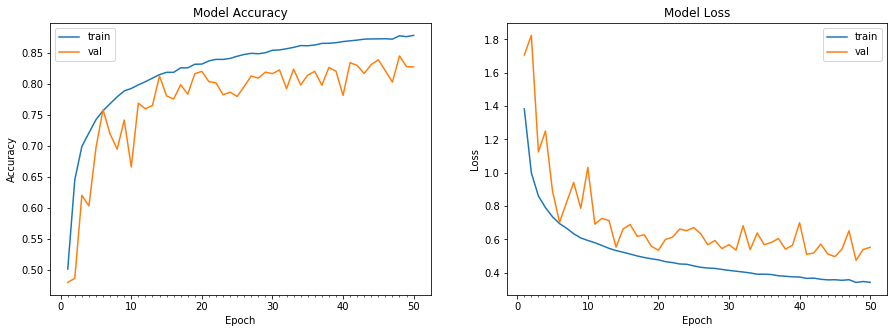

In [18]:
model=build_model(p_conv=0.1,p_lin=0.1)
model.compile(optimizer=keras.optimizers.Adam(lr=5e-3), loss='categorical_crossentropy', metrics=['accuracy'])
datagen = ImageDataGenerator(horizontal_flip=True,zoom_range=0.1)#,rotation_range=15)
#datagen = ImageDataGenerator(horizontal_flip=False,zoom_range=0.0)
start = time.time()
#finder_callback = LRFinder(model,lr_min=1e-6,lr_max=10,max_iters=900)
model_info=model.fit_generator(datagen.flow(train_features,train_labels,batch_size=128),samples_per_epoch=train_features.shape[0],nb_epoch=50,
                    validation_data=(test_features,test_labels),verbose=1)#,callbacks=[finder_callback])
end=time.time()
print(f'Total time to fit {end-start}')
plot_model_history(model_info)
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))